In [1]:
import json

cis_filter = False

if cis_filter:
  f = open('rankings_cis_actors.json', 'r')
else:
  f = open('rankings_actors.json', 'r')

original_data = json.load(f)
f.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [3]:
print(original_data)

[{'strat': 'Governments', 'mu': 3.9856940949179642, 'sigma': 0.7820039157470787}, {'strat': 'Researchers and companies', 'mu': 3.057903834351394, 'sigma': 0.7804346050168929}, {'strat': 'People', 'mu': 2.5651698346657708, 'sigma': 0.7823522713771596}]


In [4]:
## ranges
for p in original_data:
  print(p['strat'])
  print(f"{round(p['mu'] - p['sigma'],2)} / {round(p['mu'] + p['sigma'],2)} / {round(2*p['sigma'],2)}")

Governments
3.2 / 4.77 / 1.56
Researchers and companies
2.28 / 3.84 / 1.56
People
1.78 / 3.35 / 1.56


In [5]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [6]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
    
df = pd.DataFrame(data, columns=['Actor', 'Value'])
print(df)

                  Actor     Value
0       01. Governments  4.280285
1       01. Governments  3.847803
2       01. Governments  4.750547
3       01. Governments  4.864856
4       01. Governments  3.773126
5       01. Governments  4.174842
6       01. Governments  3.275200
7       01. Governments  4.008908
8       01. Governments  4.209260
9       01. Governments  4.473332
10      01. Governments  3.673377
11      01. Governments  4.288879
12      01. Governments  4.337628
13      01. Governments  4.130403
14      01. Governments  3.678961
15      01. Governments  1.677377
16      01. Governments  4.189639
17      01. Governments  3.792268
18      01. Governments  3.779774
19      01. Governments  3.010498
20      01. Governments  4.096560
21      01. Governments  4.122482
22      01. Governments  3.427501
23      01. Governments  3.516724
24      01. Governments  4.034462
25      01. Governments  4.276487
26      01. Governments  4.356690
27      01. Governments  4.077535
28      01. Go

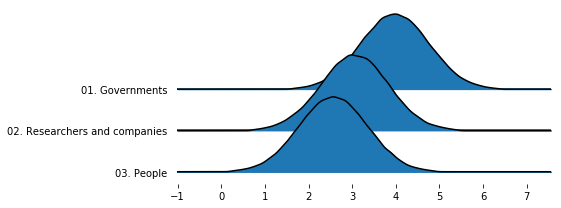

In [7]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Actor",figsize=(8,3))

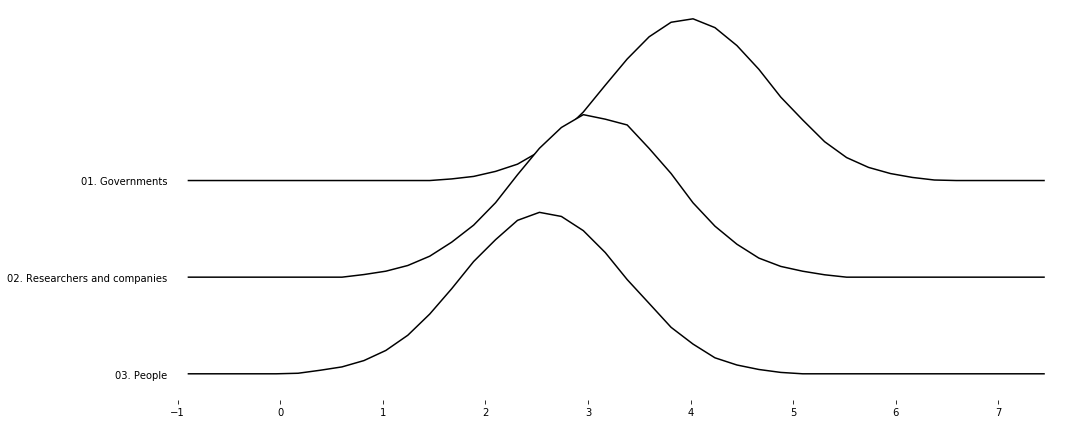

In [8]:
from matplotlib import cm

fig, axes = joypy.joyplot(df, by="Actor", 
                          grid=False, linewidth=1.5, color='w', 
                         legend=False, overlap=2, figsize=(15,6), kind="counts", bins=40)

In [9]:
fig.savefig("rank_actors.svg")